# Regresión Lineal

In [ ]:
# Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt

# Mostrar los plots
%matplotlib inline

In [ ]:
# Leer los datos
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', index_col=0)
data.columns = ['TV','Radio','Newspaper','Sales']
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


---------
Variables Descriptivas / Predictoras (Input)

- **TV:** Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** Advertising dollars spent on Radio
- **Newspaper:** Advertising dollars spent on Newspaper

Variable Respuesta (Output)

- **Sales:** sales of a single product in a given market (in thousands of widgets)

In [ ]:
# Responder a las siguientes preguntas
# ¿Cuál es mi variable objetivo? ¿Y mis variables predictoras?
# ¿Cuántas observaciones tenemos? ¿Es poco o mucho volumen?
# ¿Qué tipo de aprendizaje es?
# ¿Estamos ante un problema de regresión o de clasificación?
# ¿Qué finalidad pretendemos alcanzar?

In [ ]:
data.count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

### EDA (Análisis Explotario)

In [ ]:
# Filtramos una columna
data[["TV"]]

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8
...,...
196,38.2
197,94.2
198,177.0
199,283.6


In [ ]:
# Resumen estadístico de las variables
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


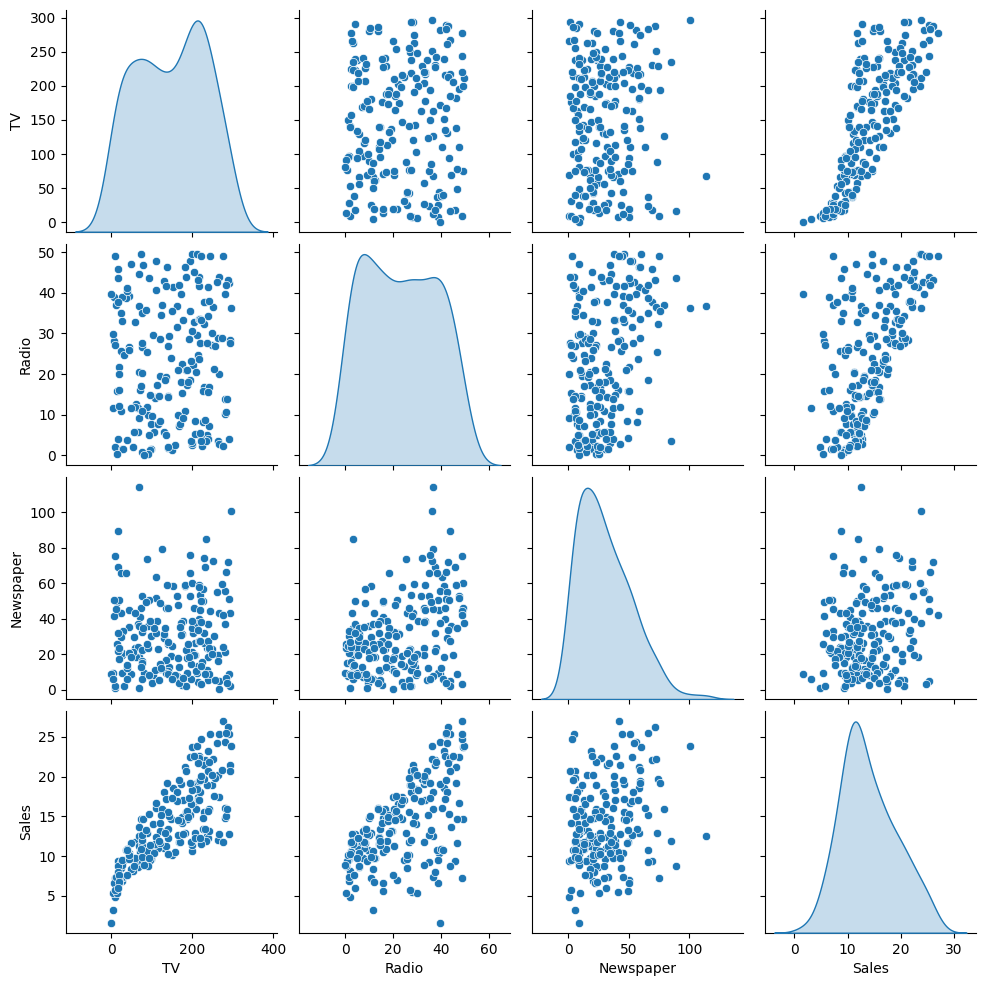

In [ ]:
# Pintamos las distribuciones de correlación
import seaborn as sns
sns.pairplot(data,diag_kind='kde')

In [ ]:
# Ejercicio
# Pintar más distribuciones (boxplot, barplot, heatmap) para visualizar valores extraños, outliers, correlaciones ...

# Ajuste lineal

Simple Linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

In [ ]:
# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data['Sales']

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


Realizar predicción

In [ ]:
# Nuevo Dato
X_new = pd.DataFrame({'TV': [100]})
X_new.head()
# predecir para un nuevo valor
lm.predict(X_new)

array([11.78625759])

In [ ]:
# Predice un nuevo resultado si el valor de X es 60 (tanto con el metodo predict como con la ecuación de la regresión lineal)


array([9.88479198])

In [ ]:
result

,TV
0,9.884792


Plot ajuste

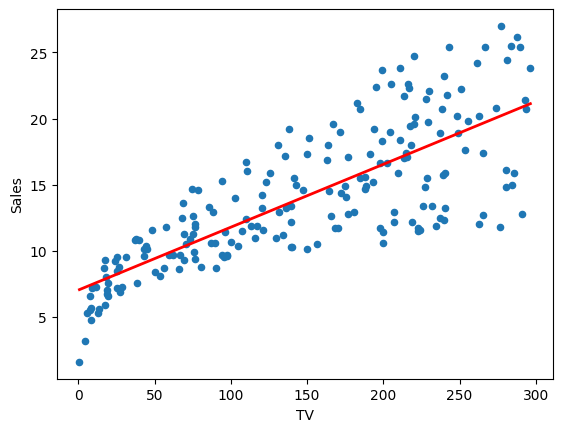

In [ ]:
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

# Realizar predicciones
preds = lm.predict(X_new)
preds

# Plot dato observado
data.plot(kind='scatter', x='TV', y='Sales')

# Plot ajuste
plt.plot(X_new, preds, c='red', linewidth=2)

Evaluación del modelo

In [ ]:
# R-squared del modelo (en el train)
lm.score(X,y)

0.611875050850071

In [ ]:
# ¿Qué más variables podríamos utilizar como predictoras?
# ¿Qué otros modelos alternativos podríamos usar? ¿Mejorarían o empeorarían su explicabilidad?